In [1]:
print("hello -world")

hello -world


In [3]:
from aalpy.SULs import RegexSUL
from aalpy.oracles import StatePrefixEqOracle
from aalpy.learning_algs import run_Lstar
from aalpy.utils import visualize_automaton


In [4]:
def regex_example(regex, alphabet):
    """
    Learn a regular expression.
    :param regex: regex to learn
    :param alphabet: alphabet of the regex
    :return: DFA representing the regex
    """
    regex_sul = RegexSUL(regex)

    eq_oracle = StatePrefixEqOracle(alphabet, regex_sul, walks_per_state=2000,
                                    walk_len=15)

    # or replace run_Lstar with run_KV
    learned_regex = run_Lstar(alphabet, regex_sul, eq_oracle, automaton_type='dfa')

    return learned_regex

In [5]:
regex = 'a*b'
alphabet = ['a', 'b']

learned_regex = regex_example(regex, alphabet)

print(f"Learned regex: {learned_regex}")
#learned_regex.visualize(file_path='learned_regex')
#visualize_automaton(learned_regex)
#assert learned_regex == "a*b$"

Hypothesis 1: 2 states.
Hypothesis 2: 3 states.
-----------------------------------
Learning Finished.
Learning Rounds:  2
Number of states: 3
Time (in seconds)
  Total                : 0.47
  Learning algorithm   : 0.0
  Conformance checking : 0.47
Learning Algorithm
 # Membership Queries  : 10
 # MQ Saved by Caching : 7
 # Steps               : 22
Equivalence Query
 # Membership Queries  : 6000
 # Steps               : 95987
-----------------------------------
Learned regex: digraph learnedModel {
s0 [label="s0"];
s1 [label="s1", shape=doublecircle];
s2 [label="s2"];
s0 -> s0  [label="a"];
s0 -> s1  [label="b"];
s1 -> s2  [label="a"];
s1 -> s2  [label="b"];
s2 -> s2  [label="a"];
s2 -> s2  [label="b"];
__start0 [label="", shape=none];
__start0 -> s0  [label=""];
}



digraph learnedModel {
s0 [label="s0"];
s1 [label="s1", shape=doublecircle];
s2 [label="s2"];
s0 -> s0  [label="a"];
s0 -> s1  [label="b"];
s1 -> s2  [label="a"];
s1 -> s2  [label="b"];
s2 -> s2  [label="a"];
s2 -> s2  [label="b"];
__start0 [label="", shape=none];
__start0 -> s0  [label=""];
}



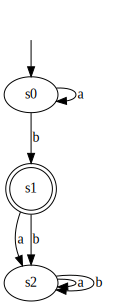

In [6]:
from graphviz import Source
print(learned_regex.__str__())
dot = Source(learned_regex.__str__())
dot